In [10]:
import pandas as pd

#PS2_1
# 读取tsv文件
data = pd.read_csv('sig_eqs.tsv', delimiter='\t')

# 选择自公元前2150年以后的数据
data = data[data['Year'] >= -2150]

#PS2_1.1
# 根据国家对死亡人数进行分组和求和
deaths_by_country = data.groupby('Country')['Total Deaths'].sum()

# 按死亡总数降序排序
deaths_by_country = deaths_by_country.sort_values(ascending=False)

# 输出前十个国家及其死亡总数
top_10_countries = deaths_by_country.head(10)

print("Top Ten Countries by Total Deaths Since 2150 B.C.:")
print(top_10_countries)


Top Ten Countries by Total Deaths Since 2150 B.C.:
Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


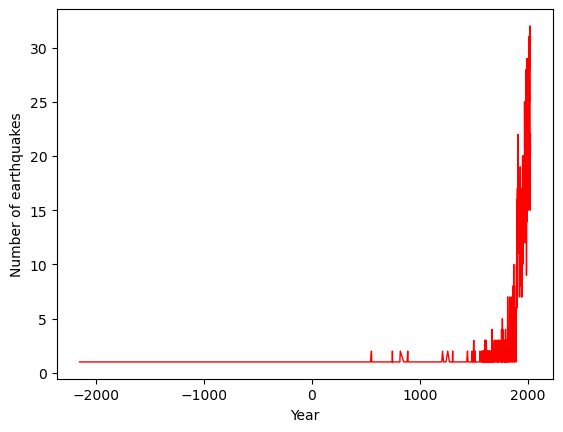

In [14]:
import matplotlib.pyplot as plt
# 选择地震震级大于6.0的数据
large_earthquakes = data[data['Mag'] > 6.0]
earthquakes_by_year = large_earthquakes.groupby(['Year'])['Country'].count()
earthquakes_by_year
plt.xlabel("Year")
plt.ylabel("Number of earthquakes")
plt.plot(earthquakes_by_year,color='red', linestyle='-',linewidth=1)
#PS2_1.2
# From the graph above, it is obvious that the number of earthquakes with magnitude larger than 6.0 gets higher rapidly in recent years.
# That may be because the data collection is gradually completed in recent years.

In [31]:
#PS2_1.3 Write the function CountEq_LargestEq
def CountEq_LargestEq(country):
    Sig_Eqs = pd.read_csv('Sig_Eqs.tsv', sep="\t")
    max_magnitude = Sig_Eqs['Mag'][Sig_Eqs['Country'] == country].max()
    largest_eq = Sig_Eqs[['Year','Mo','Dy']][(Sig_Eqs['Mag'] == max_magnitude) & (Sig_Eqs['Country'] == country)]
    
    total_eq_count = Sig_Eqs['Country'][Sig_Eqs['Country'] == country].count()
    
    return country, total_eq_count, largest_eq
CountEq_LargestEq('CHINA')
country_data = pd.read_csv('Sig_Eqs.tsv', sep="\t")
unique_countries = country_data['Country'].unique()

results = []

for country in unique_countries:
    results.append(CountEq_LargestEq(country))

results = sorted(results, key=lambda x: x[1], reverse=True)

result_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Largest Earthquake Info'])
result_df = result_df.sort_values(by='Total Earthquakes', ascending=False)

print(result_df[['Country', 'Total Earthquakes', 'Largest Earthquake Info']])


          Country  Total Earthquakes  \
0           CHINA                620   
1           JAPAN                414   
2       INDONESIA                411   
3            IRAN                384   
4          TURKEY                335   
..            ...                ...   
132       GRENADA                  1   
131        NORWAY                  1   
130  SIERRA LEONE                  1   
129       IRELAND                  1   
156           NaN                  0   

                               Largest Earthquake Info  
0               Year   Mo    Dy
982  1668.0  7.0  25.0  
1              Year   Mo    Dy
5742  2011.0  3.0  11.0  
2            Year    Mo    Dy
5340  2004.0  12.0  26.0  
3              Year    Mo    Dy
238  856.0  12.0  22.0  
4            Year    Mo    Dy
3412  1939.0  12.0  2...  
..                                                 ...  
132  Empty DataFrame
Columns: [Year, Mo, Dy]
Index: []  
131            Year   Mo    Dy
1569  1819.0  8.0  31.0  
130   

C:\Users\20418\AppData\Local\Temp\ipykernel_19160\1494314556.py:2: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('2281305.csv')
C:\Users\20418\AppData\Local\Temp\ipykernel_19160\1494314556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['WS']=df1['WS'].astype(float)
C:\Users\20418\AppData\Local\Temp\ipykernel_19160\1494314556.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1.groupby(["YEAR","MONTH"]).mean()['WS'].plot()


<Axes: xlabel='YEAR,MONTH'>

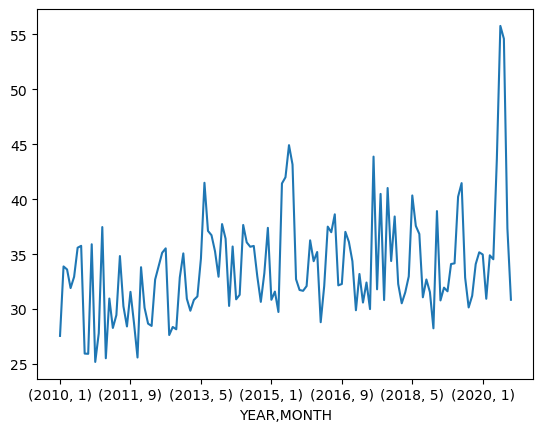

In [32]:
#PS2_2
df=pd.read_csv('2281305.csv')
df['WS'] = df['WND'].str.split(',', expand=True)[3]
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year
df['MONTH'] = pd.to_datetime(df['DATE']).dt.month
df1=df[df['WS']!='9999']

df1['WS']=df1['WS'].astype(float)
df1.groupby(["YEAR","MONTH"]).mean()['WS'].plot()

       年   月    A1    A2    A3    A4    A5     D1    D2    D3  ...     W9  \
0   2018   8  7.43  7.99  7.63  8.39  8.47  15.18  8.17  6.13  ...  10.76   
1   2018   9  7.43  8.00  7.62  8.38  8.47  15.14  8.06  6.12  ...  10.72   
2   2018  10  7.44  8.01  7.62  8.36  8.46  15.13  7.94  6.10  ...  10.65   
3   2018  11  7.93  7.60  7.80  8.32  8.42  15.15  7.94  6.12  ...  10.66   
4   2018  12  8.84  8.44  8.51  8.38  8.48  15.15  7.93  6.13  ...  10.69   
5   2019   1  8.84  8.48  8.60  8.44  8.53  15.09  7.91  6.16  ...  10.72   
6   2019   2  8.51  8.26  8.49  8.40  8.53  15.04  7.89  6.19  ...  10.84   
7   2019   3  8.39  8.17  8.50  8.50  8.66  15.02  7.90  6.20  ...  10.92   
8   2019   4  8.30  8.06  8.37  8.36  8.52  15.11  7.97  6.14  ...  10.83   
9   2019   5  8.11  7.87  8.21  8.21  8.37  15.08  8.12  6.15  ...  10.76   
10  2019   6  8.29  7.92  8.12  8.05  8.19  15.05  8.27  6.17  ...  10.73   
11  2019   7  8.88  8.35  8.30  8.09  8.18  15.00  8.19  6.15  ...  10.74   

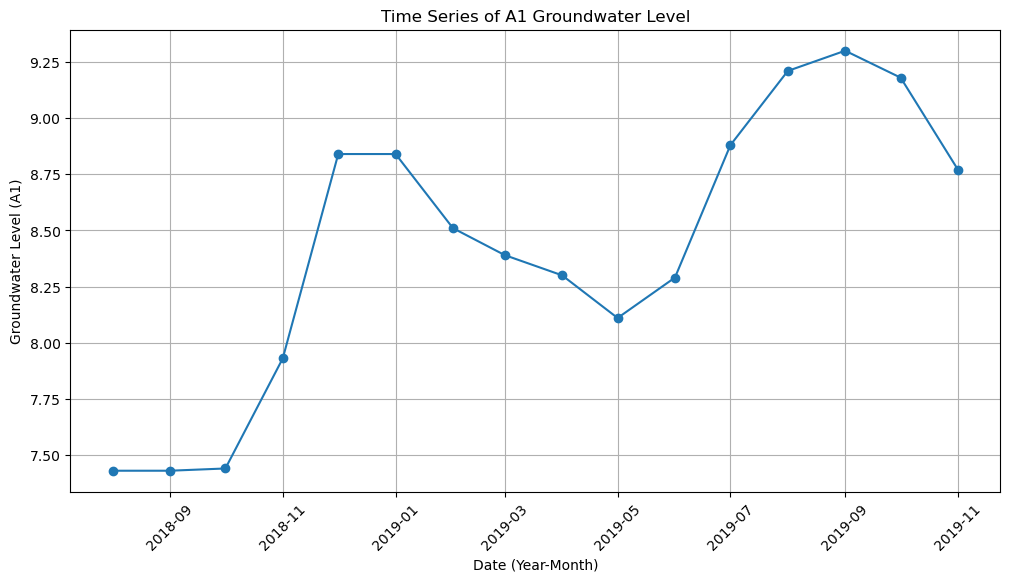

1. Maximum Value for A1: 9.3
2. Minimum Value for A1: 7.43
3. Mean Value for A1: 8.428125
4. Variance for A1: 0.39726958333333356

5. Box Plot for A1:


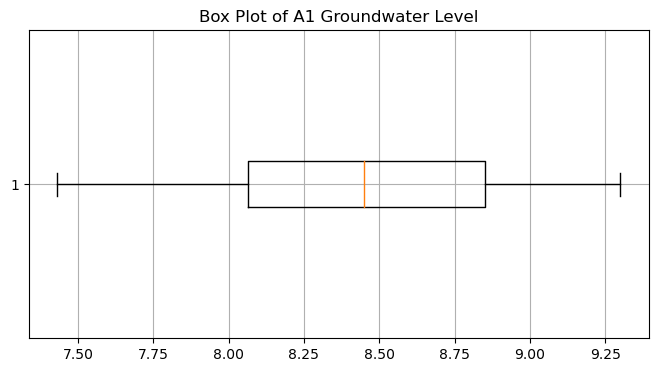

In [40]:
#PS2_3
# 3.1. 加载数据
file_path = '201808-201911Groundwater level monitoring data.xlsx'
sheet_name = '2018.8~2019.11地下水位数据'

# 读取Excel文件中的数据
data = pd.read_excel(file_path, sheet_name=sheet_name)
print(data)
# 3.2. 绘制A1变量的时间序列图
# 合并"年"和"月"列为日期列
data['Date'] = pd.to_datetime(data['年'].astype(str) + '-' + data['月'].astype(str), format='%Y-%m')

# 2. 绘制A1变量的时间序列图
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['A1'], marker='o', linestyle='-')
plt.title('Time Series of A1 Groundwater Level')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Groundwater Level (A1)')
plt.grid(True)
plt.xticks(rotation=45)  # 旋转x轴标签以显示年和月
plt.show()

#3.3 5个简单的统计检查并报告结果
# 3.3.1. 最大值
max_value = data['A1'].max()

# 3.3.2. 最小值
min_value = data['A1'].min()

# 3.3.3 平均值
mean_value = data['A1'].mean()

# 3.3.4. 方差
variance_value = data['A1'].var()

# 3.3.5. 箱型图
plt.figure(figsize=(8, 4))
plt.boxplot(data['A1'], vert=False)
plt.title('Box Plot of A1 Groundwater Level')
plt.grid(True)

# 打印统计结果
print("1. Maximum Value for A1:", max_value)
print("2. Minimum Value for A1:", min_value)
print("3. Mean Value for A1:", mean_value)
print("4. Variance for A1:", variance_value)
print("\n5. Box Plot for A1:")
plt.show()
